In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten


In [3]:
import pandas as pd

# Load the dataset from the local TSV file
file_path = 'dataset.tsv'   
df = pd.read_csv(file_path, delimiter='\t')
df.columns = ['Sentiment', 'Text']


In [4]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess the data: clean, tokenize, and vectorize
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.lower()

df['cleaned_text'] = df['Text'].apply(preprocess_text)

# Split the data
X = df['cleaned_text']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [5]:
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Train the classifier
knn.fit(X_train_tfidf, y_train)

# Make predictions on the test data
knn_pred = knn.predict(X_test_tfidf)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)
from sklearn.metrics import classification_report

# Classification report for KNN
print("Classification Report for KNN:", classification_report(y_test, knn_pred))


KNN Accuracy: 0.5231818181818182
Classification Report for KNN:               precision    recall  f1-score   support

         neg       0.96      0.03      0.05      1075
         pos       0.52      1.00      0.68      1125

    accuracy                           0.52      2200
   macro avg       0.74      0.51      0.37      2200
weighted avg       0.74      0.52      0.37      2200



In [6]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the classifier
dt.fit(X_train_tfidf, y_train)

# Make predictions on the test data
dt_pred = dt.predict(X_test_tfidf)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report for Decision Tree:\n", classification_report(y_test, dt_pred))



Decision Tree Accuracy: 0.6836363636363636
Classification Report for Decision Tree:
               precision    recall  f1-score   support

         neg       0.68      0.66      0.67      1075
         pos       0.68      0.71      0.70      1125

    accuracy                           0.68      2200
   macro avg       0.68      0.68      0.68      2200
weighted avg       0.68      0.68      0.68      2200



In [7]:
rf = RandomForestClassifier()

# Train the classifier
rf.fit(X_train_tfidf, y_train)

# Make predictions on the test data
rf_pred = rf.predict(X_test_tfidf)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report for Random Forest:\n", classification_report(y_test, rf_pred))



Random Forest Accuracy: 0.7627272727272727
Classification Report for Random Forest:
               precision    recall  f1-score   support

         neg       0.74      0.80      0.77      1075
         pos       0.79      0.73      0.76      1125

    accuracy                           0.76      2200
   macro avg       0.76      0.76      0.76      2200
weighted avg       0.76      0.76      0.76      2200



In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Logistic Regression
lr = LogisticRegression(C=1.0)
lr.fit(X_train_tfidf, y_train)
lr_pred = lr.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.815
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         neg       0.81      0.82      0.81      1075
         pos       0.82      0.81      0.82      1125

    accuracy                           0.81      2200
   macro avg       0.81      0.82      0.81      2200
weighted avg       0.82      0.81      0.82      2200



In [9]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_pred = nb.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.7972727272727272
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

         neg       0.80      0.79      0.79      1075
         pos       0.80      0.81      0.80      1125

    accuracy                           0.80      2200
   macro avg       0.80      0.80      0.80      2200
weighted avg       0.80      0.80      0.80      2200



In [10]:
from sklearn.neural_network import MLPClassifier

# Multi-Layer Perceptron (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', random_state=42)
mlp.fit(X_train_tfidf, y_train)
mlp_pred = mlp.predict(X_test_tfidf)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print("MLP Accuracy:", mlp_accuracy)
print("Classification Report for MLP:")
print(classification_report(y_test, mlp_pred))


MLP Accuracy: 0.7759090909090909
Classification Report for MLP:
              precision    recall  f1-score   support

         neg       0.78      0.75      0.77      1075
         pos       0.77      0.80      0.78      1125

    accuracy                           0.78      2200
   macro avg       0.78      0.78      0.78      2200
weighted avg       0.78      0.78      0.78      2200



In [11]:
from sklearn.svm import SVC

# Support Vector Machine (SVM)
svm = SVC(C=1.0, kernel='rbf', random_state=42)
svm.fit(X_train_tfidf, y_train)
svm_pred = svm.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)
print("Classification Report for SVM:")
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.8190909090909091
Classification Report for SVM:
              precision    recall  f1-score   support

         neg       0.80      0.83      0.82      1075
         pos       0.84      0.80      0.82      1125

    accuracy                           0.82      2200
   macro avg       0.82      0.82      0.82      2200
weighted avg       0.82      0.82      0.82      2200



In [12]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier

# AdaBoost
ab = AdaBoostClassifier(base_estimator=nb, random_state=42)
ab.fit(X_train_tfidf, y_train)
ab_pred = ab.predict(X_test_tfidf)
ab_accuracy = accuracy_score(y_test, ab_pred)
print("AdaBoost Accuracy:", ab_accuracy)
print("Classification Report for AdaBoost:")
print(classification_report(y_test, ab_pred))

# Bagging
bag = BaggingClassifier(base_estimator=nb, random_state=42)
bag.fit(X_train_tfidf, y_train)
bag_pred = bag.predict(X_test_tfidf)
bag_accuracy = accuracy_score(y_test, bag_pred)
print("Bagging Accuracy:", bag_accuracy)
print("Classification Report for Bagging:")
print(classification_report(y_test, bag_pred))

# Majority and Weighted Voting
wVoting = VotingClassifier(estimators=[('lr', lr), ('nb', nb), ('svm', svm)], voting='hard')
wVoting.fit(X_train_tfidf, y_train)
wVoting_pred = wVoting.predict(X_test_tfidf)
wVoting_accuracy = accuracy_score(y_test, wVoting_pred)
print("Voting Accuracy:", wVoting_accuracy)
print("Classification Report for Voting:")
print(classification_report(y_test, wVoting_pred))


C:\Users\maham\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.6431818181818182
Classification Report for AdaBoost:
              precision    recall  f1-score   support

         neg       0.81      0.35      0.49      1075
         pos       0.60      0.92      0.73      1125

    accuracy                           0.64      2200
   macro avg       0.71      0.64      0.61      2200
weighted avg       0.70      0.64      0.61      2200

Bagging Accuracy: 0.7959090909090909
Classification Report for Bagging:
              precision    recall  f1-score   support

         neg       0.80      0.78      0.79      1075
         pos       0.80      0.81      0.80      1125

    accuracy                           0.80      2200
   macro avg       0.80      0.80      0.80      2200
weighted avg       0.80      0.80      0.80      2200



C:\Users\maham\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Voting Accuracy: 0.8190909090909091
Classification Report for Voting:
              precision    recall  f1-score   support

         neg       0.81      0.83      0.82      1075
         pos       0.83      0.81      0.82      1125

    accuracy                           0.82      2200
   macro avg       0.82      0.82      0.82      2200
weighted avg       0.82      0.82      0.82      2200



In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels for training data
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the target labels for test data (use only transform)
y_test_encoded = label_encoder.transform(y_test)


In [15]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df' with columns 'Text' and 'Sentiment'
X = df['Text'].astype(str)  # Text data
y = df['Sentiment']  # Sentiment labels

# Tokenize and pad sequences
max_words = 5000  # Assuming maximum number of words
max_len = 100  # Assuming maximum length of sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

# Build LSTM model
lstm = Sequential()
lstm.add(Embedding(input_dim=max_words, output_dim=100))  # Removed input_length
lstm.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
lstm.add(Dense(units=1, activation='sigmoid'))

# Compile and train the model
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, lstm_accuracy = lstm.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:",lstm_accuracy)




Epoch 1/10


138/138 [==============================] - 32s 205ms/step - loss: -8.3112 - accuracy: 0.4774 - val_loss: -13.1219 - val_accuracy: 0.4886
Epoch 2/10
138/138 [==============================] - 28s 201ms/step - loss: -17.1074 - accuracy: 0.4801 - val_loss: -20.5259 - val_accuracy: 0.4886
Epoch 3/10
138/138 [==============================] - 27s 197ms/step - loss: -24.5046 - accuracy: 0.4801 - val_loss: -27.8607 - val_accuracy: 0.4886
Epoch 4/10
138/138 [==============================] - 34s 244ms/step - loss: -31.9934 - accuracy: 0.4801 - val_loss: -35.1441 - val_accuracy: 0.4886
Epoch 5/10
138/138 [==============================] - 30s 219ms/step - loss: -39.3378 - accuracy: 0.4801 - val_loss: -42.3325 - val_accuracy: 0.4886
Epoch 6/10
138/138 [==============================] - 33s 237ms/step - loss: -46.6088 - accuracy: 0.4801 - val_loss: -49.4599 - val_accuracy: 0.4886
Epoch 7/10
138/138 [==============================] - 32s 234ms/step - loss: -53.8433 - accuracy: 0.480

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer


In [16]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

X = df['Text'].astype(str)  # Text data
y = df['Sentiment']  # Sentiment labels

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 2: Tokenize and pad sequences
max_words = 5000  # Assuming maximum number of words
max_len = 100  # Assuming maximum length of sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Split data into train and test sets
X_train_pad, X_test_pad, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

# Step 3: Build CNN model
cnn = Sequential()
cnn.add(Embedding(input_dim=max_words, output_dim=100))  # Removed input_length
cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn.add(GlobalMaxPooling1D())
cnn.add(Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
cnn.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

# Step 5: Evaluate the model
y_pred_cnn = (cnn.predict(X_test_pad) > 0.5).astype("int32")
print("CNN Classification Report:\n", classification_report(y_test, y_pred_cnn))
loss, cnn_accuracy = cnn.evaluate(X_test_pad, y_test)
print("CNN Accuracy:", cnn_accuracy)

Epoch 1/10
138/138 [==============================] - 7s 34ms/step - loss: -61.9279 - accuracy: 0.4801 - val_loss: -264.1162 - val_accuracy: 0.4886
Epoch 2/10
138/138 [==============================] - 4s 31ms/step - loss: -1168.9811 - accuracy: 0.4801 - val_loss: -2604.6519 - val_accuracy: 0.4886
Epoch 3/10
138/138 [==============================] - 4s 32ms/step - loss: -5628.5039 - accuracy: 0.4801 - val_loss: -9499.8096 - val_accuracy: 0.4886
Epoch 4/10
138/138 [==============================] - 5s 33ms/step - loss: -15882.8936 - accuracy: 0.4801 - val_loss: -23164.8750 - val_accuracy: 0.4886
Epoch 5/10
138/138 [==============================] - 5s 34ms/step - loss: -34114.5859 - accuracy: 0.4801 - val_loss: -45660.2266 - val_accuracy: 0.4886
Epoch 6/10
138/138 [==============================] - 4s 31ms/step - loss: -62049.2969 - accuracy: 0.4801 - val_loss: -78378.4453 - val_accuracy: 0.4886
Epoch 7/10
138/138 [==============================] - 6s 40ms/step - loss: -101149.1094 - a

C:\Users\maham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


69/69 [==============================] - 0s 4ms/step - loss: -336618.1562 - accuracy: 0.4886
CNN Accuracy: 0.4886363744735718


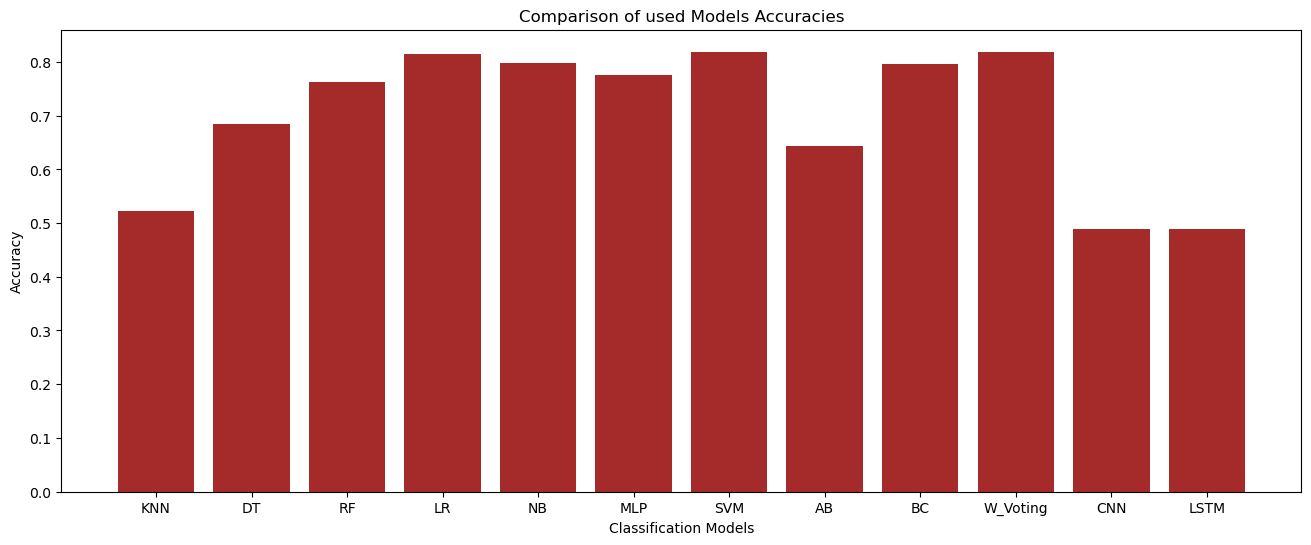

In [29]:
import matplotlib.pyplot as plt

# Example of comparing accuracy
models = ['KNN', 'DT', 'RF', 'LR', 'NB', 'MLP', 'SVM', 'AB', 'BC','W_Voting', 'CNN','LSTM']
accuracies = [knn_accuracy,dt_accuracy, rf_accuracy, lr_accuracy,nb_accuracy, mlp_accuracy,svm_accuracy, ab_accuracy, bag_accuracy,wVoting_accuracy,cnn_accuracy,lstm_accuracy ]

plt.figure(figsize=(16, 6))
plt.bar(models, accuracies, color='brown')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of used Models Accuracies')
plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

# Load the dataset
dataset_path = 'dataset.tsv'
df = pd.read_csv(dataset_path, delimiter='\t', encoding='utf-8', header=None, names=['label', 'text'])

# Preprocess the dataset
df['label'] = df['label'].apply(lambda x: 0 if x == 'neg' else 1)
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to extract features
def extract_features(X_train, X_test, feature_type='word', ngram_range=(1,1), max_features=5000):
    if feature_type == 'word':
        vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=max_features)
    elif feature_type == 'char':
        vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range, max_features=max_features)
    else:
        raise ValueError("Invalid feature_type")

    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    return X_train_vec, X_test_vec

# Extract word-level features (Unigrams)
X_train_word_uni, X_test_word_uni = extract_features(X_train, X_test, feature_type='word', ngram_range=(1,1))

# Extract word-level features (Bigrams)
X_train_word_bi, X_test_word_bi = extract_features(X_train, X_test, feature_type='word', ngram_range=(1,2))

# Extract character-level features (Bigrams)
X_train_char_bi, X_test_char_bi = extract_features(X_train, X_test, feature_type='char', ngram_range=(2,2))

# Combine word-level and character-level features
X_train_combined = hstack([X_train_word_bi, X_train_char_bi])
X_test_combined = hstack([X_test_word_bi, X_test_char_bi])


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNN Model with word-level (unigrams)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train_word_uni, y_train)
y_pred_knn = knn.predict(X_test_word_uni)
accuracy_knn_word_uni = accuracy_score(y_test, y_pred_knn)
print(f'KNN with word-level Accuracy: {accuracy_knn_word_uni:.2f}')

# KNN Model with character-level (bigrams)
knn.fit(X_train_char_bi, y_train)
y_pred_knn = knn.predict(X_test_char_bi)
accuracy_knn_char_bi = accuracy_score(y_test, y_pred_knn)
print(f'KNN with character-level Accuracy: {accuracy_knn_char_bi:.2f}')

# KNN Model with combined features
knn.fit(X_train_combined, y_train)
y_pred_knn = knn.predict(X_test_combined)
accuracy_knn_combined = accuracy_score(y_test, y_pred_knn)
print(f'KNN with combined features Accuracy: {accuracy_knn_combined:.2f}')


KNN with word-level Accuracy: 0.61
KNN with character-level Accuracy: 0.67
KNN with combined features Accuracy: 0.68


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree Model with word-level (unigrams)
dt = DecisionTreeClassifier()
dt.fit(X_train_word_uni, y_train)
y_pred_dt = dt.predict(X_test_word_uni)
accuracy_dt_word_uni = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree with word-level Accuracy: {accuracy_dt_word_uni:.2f}')

# Decision Tree Model with character-level (bigrams)
dt.fit(X_train_char_bi, y_train)
y_pred_dt = dt.predict(X_test_char_bi)
accuracy_dt_char_bi = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree with character-level Accuracy: {accuracy_dt_char_bi:.2f}')

# Decision Tree Model with combined features
dt.fit(X_train_combined, y_train)
y_pred_dt = dt.predict(X_test_combined)
accuracy_dt_combined = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree with combined features Accuracy: {accuracy_dt_combined:.2f}')


Decision Tree with word-level Accuracy: 0.70
Decision Tree with character-level Accuracy: 0.64
Decision Tree with combined features Accuracy: 0.67


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest Model with word-level (unigrams)
rf = RandomForestClassifier()
rf.fit(X_train_word_uni, y_train)
y_pred_rf = rf.predict(X_test_word_uni)
accuracy_rf_word_uni = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest with word-level Accuracy: {accuracy_rf_word_uni:.2f}')

# Random Forest Model with character-level (bigrams)
rf.fit(X_train_char_bi, y_train)
y_pred_rf = rf.predict(X_test_char_bi)
accuracy_rf_char_bi = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest with character-level Accuracy: {accuracy_rf_char_bi:.2f}')

# Random Forest Model with combined features
rf.fit(X_train_combined, y_train)
y_pred_rf = rf.predict(X_test_combined)
accuracy_rf_combined = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest with combined features Accuracy: {accuracy_rf_combined:.2f}')


Random Forest with word-level Accuracy: 0.77
Random Forest with character-level Accuracy: 0.74
Random Forest with combined features Accuracy: 0.75


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression Model with word-level (unigrams)
lr = LogisticRegression(C=1.0, max_iter=1000)
lr.fit(X_train_word_uni, y_train)
y_pred_lr = lr.predict(X_test_word_uni)
accuracy_lr_word_uni = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression with word-level Accuracy: {accuracy_lr_word_uni:.2f}')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression Model with character-level (bigrams)
lr = LogisticRegression(C=1.0, max_iter=2000)  # Increased max_iter
lr.fit(X_train_char_bi, y_train)
y_pred_lr = lr.predict(X_test_char_bi)
accuracy_lr_char_bi = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression with character-level Accuracy: {accuracy_lr_char_bi:.2f}')

# Logistic Regression Model with combined features
lr.fit(X_train_combined, y_train)
y_pred_lr = lr.predict(X_test_combined)
accuracy_lr_combined = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression with combined features Accuracy: {accuracy_lr_combined:.2f}')


Logistic Regression with word-level Accuracy: 0.80
Logistic Regression with character-level Accuracy: 0.76
Logistic Regression with combined features Accuracy: 0.81


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Naive Bayes Model with word-level (unigrams)
nb = MultinomialNB()
nb.fit(X_train_word_uni, y_train)
y_pred_nb = nb.predict(X_test_word_uni)
accuracy_nb_word_uni = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes with word-level  Accuracy: {accuracy_nb_word_uni:.2f}')

# Naive Bayes Model with character-level (bigrams)
nb.fit(X_train_char_bi, y_train)
y_pred_nb = nb.predict(X_test_char_bi)
accuracy_nb_char_bi = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes with character-level Accuracy: {accuracy_nb_char_bi:.2f}')

# Naive Bayes Model with combined features
nb.fit(X_train_combined, y_train)
y_pred_nb = nb.predict(X_test_combined)
accuracy_nb_combined = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes with combined features Accuracy: {accuracy_nb_combined:.2f}')


Naive Bayes with word-level  Accuracy: 0.79
Naive Bayes with character-level Accuracy: 0.72
Naive Bayes with combined features Accuracy: 0.79


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# MLP Model with word-level (unigrams)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=100)  # Reduced max_iter
mlp.fit(X_train_word_uni, y_train)
y_pred_mlp = mlp.predict(X_test_word_uni)
accuracy_mlp_word_uni = accuracy_score(y_test, y_pred_mlp)
print(f'MLP with word-level Accuracy: {accuracy_mlp_word_uni:.2f}')

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# MLP Model with character-level (bigrams)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500)  # Increased max_iter
mlp.fit(X_train_char_bi, y_train)
y_pred_mlp = mlp.predict(X_test_char_bi)
accuracy_mlp_char_bi = accuracy_score(y_test, y_pred_mlp)
print(f'MLP with character-level Accuracy: {accuracy_mlp_char_bi:.2f}')

# MLP Model with combined features
mlp.fit(X_train_combined, y_train)
y_pred_mlp = mlp.predict(X_test_combined)
accuracy_mlp_combined = accuracy_score(y_test, y_pred_mlp)
print(f'MLP with combined features Accuracy: {accuracy_mlp_combined:.2f}')


C:\Users\maham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP with word-level Accuracy: 0.79
MLP with character-level Accuracy: 0.76
MLP with combined features Accuracy: 0.80


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM Model with word-level (unigrams)
svm = SVC(C=1.0, kernel='rbf')
svm.fit(X_train_word_uni, y_train)
y_pred_svm = svm.predict(X_test_word_uni)
accuracy_svm_word_uni = accuracy_score(y_test, y_pred_svm)
print(f'SVM with word-leveL Accuracy: {accuracy_svm_word_uni:.2f}')

# SVM Model with character-level (bigrams)
svm.fit(X_train_char_bi, y_train)
y_pred_svm = svm.predict(X_test_char_bi)
accuracy_svm_char_bi = accuracy_score(y_test, y_pred_svm)
print(f'SVM with character-level Accuracy: {accuracy_svm_char_bi:.2f}')

# SVM Model with combined features
svm.fit(X_train_combined, y_train)
y_pred_svm = svm.predict(X_test_combined)
accuracy_svm_combined = accuracy_score(y_test, y_pred_svm)
print(f'SVM with combined features Accuracy: {accuracy_svm_combined:.2f}')


SVM with word-leveL Accuracy: 0.78
SVM with character-level Accuracy: 0.74
SVM with combined features Accuracy: 0.76


In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# AdaBoost with Logistic Regression with word-level (unigrams)
ab_lr = AdaBoostClassifier(estimator=LogisticRegression(C=1.0, max_iter=100), n_estimators=50)  # Reduced max_iter
ab_lr.fit(X_train_word_uni, y_train)
y_pred_ab_lr = ab_lr.predict(X_test_word_uni)
accuracy_ab_lr_word_uni = accuracy_score(y_test, y_pred_ab_lr)
print(f'AdaBoost LR with word-level Accuracy: {accuracy_ab_lr_word_uni:.2f}')

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# AdaBoost with Logistic Regression with character-level (bigrams)
ab_lr = AdaBoostClassifier(estimator=LogisticRegression(C=1.0, max_iter=2000), n_estimators=50)  # Increased max_iter
ab_lr.fit(X_train_char_bi, y_train)
y_pred_ab_lr = ab_lr.predict(X_test_char_bi)
accuracy_ab_lr_char_bi = accuracy_score(y_test, y_pred_ab_lr)
print(f'AdaBoost LR with character-level Accuracy: {accuracy_ab_lr_char_bi:.2f}')

# AdaBoost with Logistic Regression with combined features
ab_lr.fit(X_train_combined, y_train)
y_pred_ab_lr = ab_lr.predict(X_test_combined)
accuracy_ab_lr_combined = accuracy_score(y_test, y_pred_ab_lr)
print(f'AdaBoost LR with combined features Accuracy: {accuracy_ab_lr_combined:.2f}')


AdaBoost LR with word-level Accuracy: 0.73
AdaBoost LR with character-level Accuracy: 0.72
AdaBoost LR with combined features Accuracy: 0.76


In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Bagging with Logistic Regression with word-level (unigrams)
bag_lr = BaggingClassifier(estimator=LogisticRegression(C=1.0, max_iter=500), n_estimators=50)  # Reduced max_iter
bag_lr.fit(X_train_word_uni, y_train)
y_pred_bag_lr = bag_lr.predict(X_test_word_uni)
accuracy_bag_lr_word_uni = accuracy_score(y_test, y_pred_bag_lr)
print(f'Bagging LR with word-level (unigrams) Accuracy: {accuracy_bag_lr_word_uni:.2f}')

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Bagging with Logistic Regression with character-level (bigrams)
bag_lr = BaggingClassifier(estimator=LogisticRegression(C=1.0, max_iter=2000), n_estimators=50)  # Increased max_iter
bag_lr.fit(X_train_char_bi, y_train)
y_pred_bag_lr = bag_lr.predict(X_test_char_bi)
accuracy_bag_lr_char_bi = accuracy_score(y_test, y_pred_bag_lr)
print(f'Bagging LR with character-level (bigrams) Accuracy: {accuracy_bag_lr_char_bi:.2f}')

# Bagging with Logistic Regression with combined features
bag_lr.fit(X_train_combined, y_train)
y_pred_bag_lr = bag_lr.predict(X_test_combined)
accuracy_bag_lr_combined = accuracy_score(y_test, y_pred_bag_lr)
print(f'Bagging LR with combined features Accuracy: {accuracy_bag_lr_combined:.2f}')


Bagging LR with word-level (unigrams) Accuracy: 0.81
Bagging LR with character-level (bigrams) Accuracy: 0.76
Bagging LR with combined features Accuracy: 0.82


In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Voting Classifier with word-level (unigrams)
voting = VotingClassifier(estimators=[
    ('lr', LogisticRegression(C=1.0, max_iter=100)),  # Reduced max_iter
    ('nb', MultinomialNB()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=100))],  # Reduced max_iter
    voting='soft')
voting.fit(X_train_word_uni, y_train)
y_pred_voting = voting.predict(X_test_word_uni)
accuracy_voting_word_uni = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier with word-level Accuracy: {accuracy_voting_word_uni:.2f}')

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Voting Classifier with character-level (bigrams)
voting = VotingClassifier(estimators=[
    ('lr', LogisticRegression(C=1.0, max_iter=2000)),  # Increased max_iter
    ('nb', MultinomialNB()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500))],  # Increased max_iter
    voting='soft')
voting.fit(X_train_char_bi, y_train)
y_pred_voting = voting.predict(X_test_char_bi)
accuracy_voting_char_bi = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier with character-level Accuracy: {accuracy_voting_char_bi:.2f}')

# Voting Classifier with combined features
voting.fit(X_train_combined, y_train)
y_pred_voting = voting.predict(X_test_combined)
accuracy_voting_combined = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier with combined features Accuracy: {accuracy_voting_combined:.2f}')


C:\Users\maham\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier with word-level Accuracy: 0.81
Voting Classifier with character-level Accuracy: 0.77
Voting Classifier with combined features Accuracy: 0.82


In [13]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Weighted Voting Classifier with word-level (unigrams)
weighted_voting = VotingClassifier(estimators=[
    ('lr', LogisticRegression(C=1.0, max_iter=100)),  # Reduced max_iter
    ('nb', MultinomialNB()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=100))],  # Reduced max_iter
    voting='soft', weights=[2,1,2])
weighted_voting.fit(X_train_word_uni, y_train)
y_pred_weighted_voting = weighted_voting.predict(X_test_word_uni)
accuracy_weighted_voting_word_uni = accuracy_score(y_test, y_pred_weighted_voting)
print(f'Weighted Voting Classifier with word-level Accuracy: {accuracy_weighted_voting_word_uni:.2f}')

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Weighted Voting Classifier with character-level (bigrams)
weighted_voting = VotingClassifier(estimators=[
    ('lr', LogisticRegression(C=1.0, max_iter=2000)),  # Increased max_iter
    ('nb', MultinomialNB()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500))],  # Increased max_iter
    voting='soft', weights=[2,1,2])
weighted_voting.fit(X_train_char_bi, y_train)
y_pred_weighted_voting = weighted_voting.predict(X_test_char_bi)
accuracy_weighted_voting_char_bi = accuracy_score(y_test, y_pred_weighted_voting)
print(f'Weighted Voting Classifier with character-level Accuracy: {accuracy_weighted_voting_char_bi:.2f}')

# Weighted Voting Classifier with combined features
weighted_voting.fit(X_train_combined, y_train)
y_pred_weighted_voting = weighted_voting.predict(X_test_combined)
accuracy_weighted_voting_combined = accuracy_score(y_test, y_pred_weighted_voting)
print(f'Weighted Voting Classifier with combined features Accuracy: {accuracy_weighted_voting_combined:.2f}')


C:\Users\maham\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\maham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Weighted Voting Classifier with word-level Accuracy: 0.80
Weighted Voting Classifier with character-level Accuracy: 0.77
Weighted Voting Classifier with combined features Accuracy: 0.81


In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

# Preprocess text data for deep learning models
max_features = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# LSTM Model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
model_lstm.add(SpatialDropout1D(0.2))
model_lstm.add(LSTM(196, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM
model_lstm.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate LSTM
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_pad, y_test)
print(f'LSTM Accuracy: {accuracy_lstm:.2f}')





Epoch 1/10


138/138 [==============================] - 71s 461ms/step - loss: 0.5645 - accuracy: 0.6964 - val_loss: 0.4622 - val_accuracy: 0.7768
Epoch 2/10
138/138 [==============================] - 66s 476ms/step - loss: 0.3679 - accuracy: 0.8409 - val_loss: 0.4222 - val_accuracy: 0.8145
Epoch 3/10
138/138 [==============================] - 64s 459ms/step - loss: 0.2811 - accuracy: 0.8850 - val_loss: 0.4381 - val_accuracy: 0.8127
Epoch 4/10
138/138 [==============================] - 62s 452ms/step - loss: 0.2234 - accuracy: 0.9110 - val_loss: 0.4904 - val_accuracy: 0.7982
Epoch 5/10
138/138 [==============================] - 66s 479ms/step - loss: 0.1836 - accuracy: 0.9317 - val_loss: 0.5228 - val_accuracy: 0.8009
Epoch 6/10
138/138 [==============================] - 67s 484ms/step - loss: 0.1497 - accuracy: 0.9455 - val_loss: 0.5619 - val_accuracy: 0.7886
Epoch 7/10
138/138 [==============================] - 66s 481ms/step - loss: 0.1180 - accuracy: 0.9564 - val_loss: 0.7474 - v

In [15]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preprocess text data for deep learning models
max_features = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# CNN Model
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
model_cnn.add(SpatialDropout1D(0.2))
model_cnn.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(180, activation='tanh'))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train CNN
model_cnn.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate CNN
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_pad, y_test)
print(f'CNN Accuracy: {accuracy_cnn:.2f}')


Epoch 1/10
138/138 [==============================] - 5s 26ms/step - loss: 0.5682 - accuracy: 0.6843 - val_loss: 0.4393 - val_accuracy: 0.7882
Epoch 2/10
138/138 [==============================] - 4s 29ms/step - loss: 0.3258 - accuracy: 0.8589 - val_loss: 0.4059 - val_accuracy: 0.8177
Epoch 3/10
138/138 [==============================] - 3s 24ms/step - loss: 0.1776 - accuracy: 0.9310 - val_loss: 0.4789 - val_accuracy: 0.8109
Epoch 4/10
138/138 [==============================] - 3s 24ms/step - loss: 0.0810 - accuracy: 0.9756 - val_loss: 0.6185 - val_accuracy: 0.8086
Epoch 5/10
138/138 [==============================] - 3s 24ms/step - loss: 0.0456 - accuracy: 0.9880 - val_loss: 0.7276 - val_accuracy: 0.8009
Epoch 6/10
138/138 [==============================] - 3s 24ms/step - loss: 0.0290 - accuracy: 0.9937 - val_loss: 0.8162 - val_accuracy: 0.8041
Epoch 7/10
138/138 [==============================] - 3s 24ms/step - loss: 0.0244 - accuracy: 0.9959 - val_loss: 0.8385 - val_accuracy: 0.8059

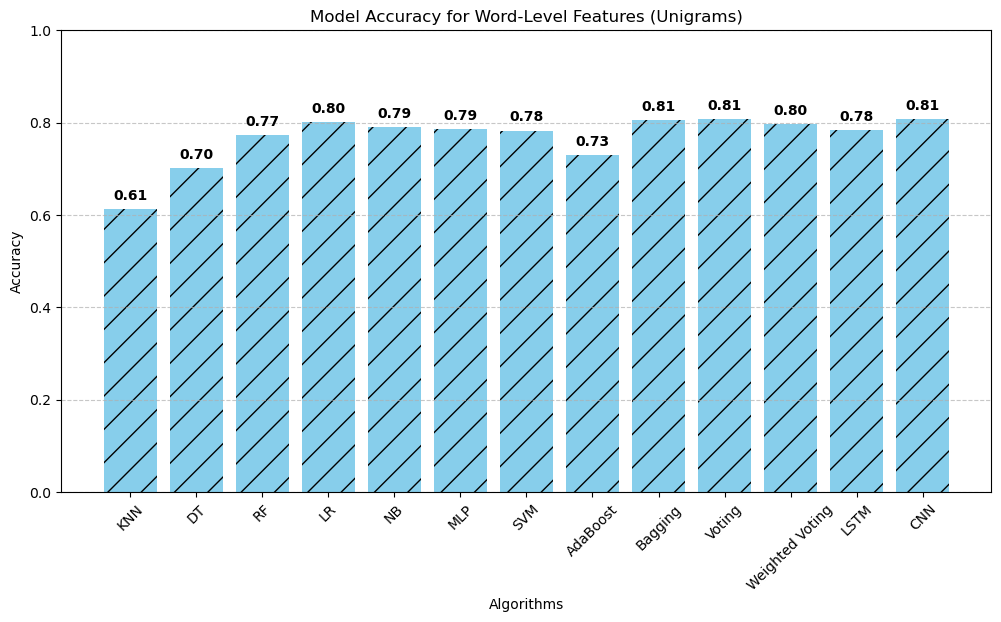

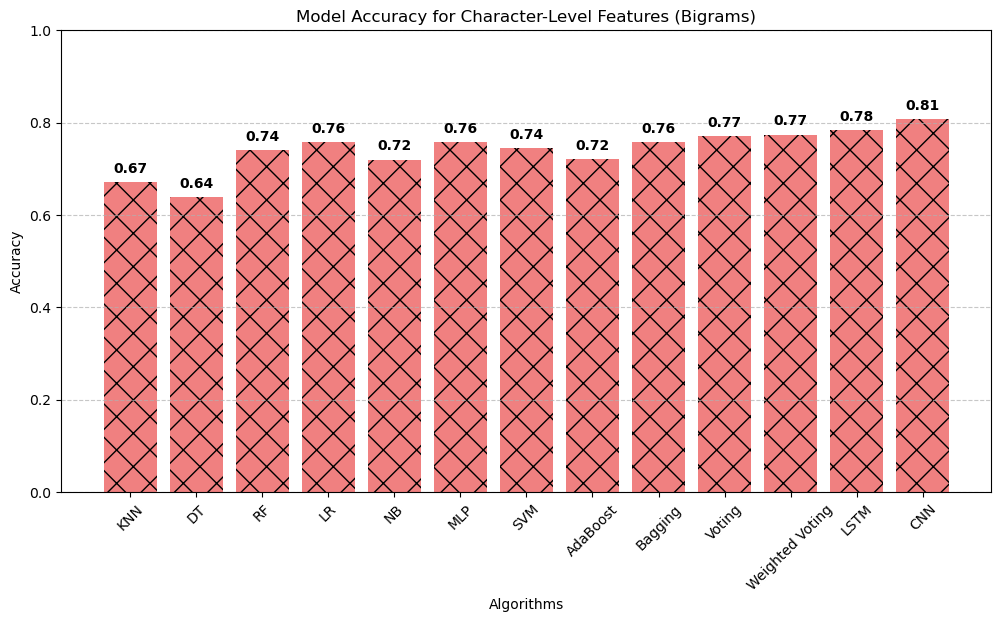

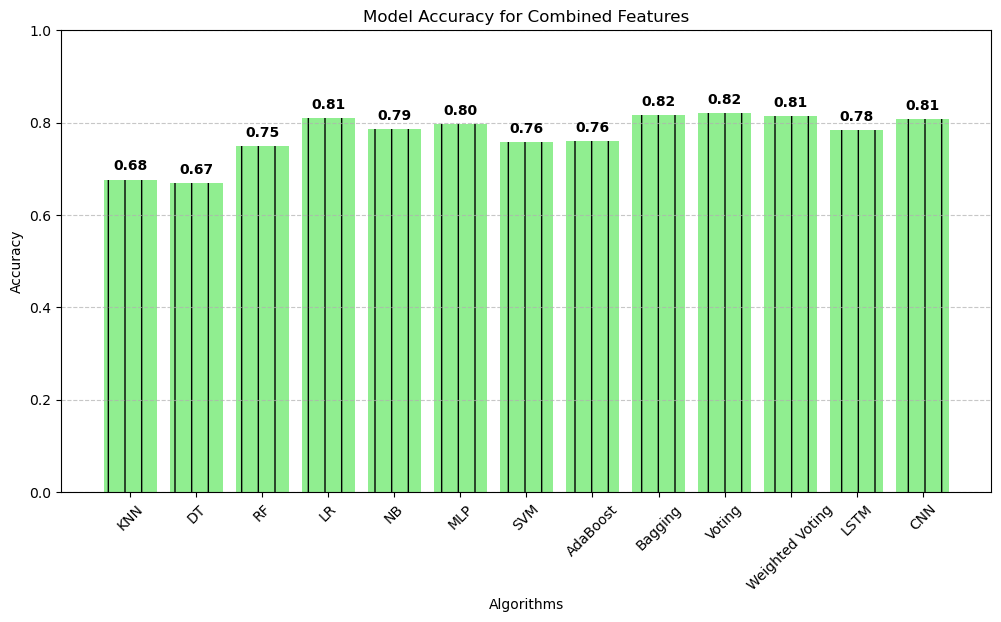

In [16]:
import matplotlib.pyplot as plt

# Collecting results
results = {
    'KNN': {
        'Word-Level': accuracy_knn_word_uni,
        'Char-Level': accuracy_knn_char_bi,
        'Combined': accuracy_knn_combined
    },
    'DT': {
        'Word-Level': accuracy_dt_word_uni,
        'Char-Level': accuracy_dt_char_bi,
        'Combined': accuracy_dt_combined
    },
    'RF': {
        'Word-Level': accuracy_rf_word_uni,
        'Char-Level': accuracy_rf_char_bi,
        'Combined': accuracy_rf_combined
    },
    'LR': {
        'Word-Level': accuracy_lr_word_uni,
        'Char-Level': accuracy_lr_char_bi,
        'Combined': accuracy_lr_combined
    },
    'NB': {
        'Word-Level': accuracy_nb_word_uni,
        'Char-Level': accuracy_nb_char_bi,
        'Combined': accuracy_nb_combined
    },
    'MLP': {
        'Word-Level': accuracy_mlp_word_uni,
        'Char-Level': accuracy_mlp_char_bi,
        'Combined': accuracy_mlp_combined
    },
    'SVM': {
        'Word-Level': accuracy_svm_word_uni,
        'Char-Level': accuracy_svm_char_bi,
        'Combined': accuracy_svm_combined
    },
    'AdaBoost': {
        'Word-Level': accuracy_ab_lr_word_uni,
        'Char-Level': accuracy_ab_lr_char_bi,
        'Combined': accuracy_ab_lr_combined
    },
    'Bagging': {
        'Word-Level': accuracy_bag_lr_word_uni,
        'Char-Level': accuracy_bag_lr_char_bi,
        'Combined': accuracy_bag_lr_combined
    },
    'Voting': {
        'Word-Level': accuracy_voting_word_uni,
        'Char-Level': accuracy_voting_char_bi,
        'Combined': accuracy_voting_combined
    },
    'Weighted Voting': {
        'Word-Level': accuracy_weighted_voting_word_uni,
        'Char-Level': accuracy_weighted_voting_char_bi,
        'Combined': accuracy_weighted_voting_combined
    },
    'LSTM': {
        'Word-Level': accuracy_lstm,  # Placeholder
        'Char-Level': accuracy_lstm,  # Placeholder
        'Combined': accuracy_lstm  # Placeholder
    },
    'CNN': {
        'Word-Level': accuracy_cnn,  # Placeholder
        'Char-Level': accuracy_cnn,  # Placeholder
        'Combined': accuracy_cnn  # Placeholder
    }
}

# Plotting Unigram Results
unigram_results = {model: accuracies['Word-Level'] for model, accuracies in results.items()}

plt.figure(figsize=(12, 6))
plt.bar(unigram_results.keys(), unigram_results.values(), color='skyblue', hatch='/')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model Accuracy for Word-Level Features (Unigrams)')
for i, v in enumerate(unigram_results.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting Character-Level Results
char_results = {model: accuracies['Char-Level'] for model, accuracies in results.items()}

plt.figure(figsize=(12, 6))
plt.bar(char_results.keys(), char_results.values(), color='lightcoral', hatch='x')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model Accuracy for Character-Level Features (Bigrams)')
for i, v in enumerate(char_results.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting Combined Results
combined_results = {model: accuracies['Combined'] for model, accuracies in results.items()}

plt.figure(figsize=(12, 6))
plt.bar(combined_results.keys(), combined_results.values(), color='lightgreen', hatch='|')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model Accuracy for Combined Features')
for i, v in enumerate(combined_results.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
